In [119]:
file_path = "/Users/anoushka/Documents/Python Practice/Bank Data (1) (1).csv"
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
%matplotlib inline

In [120]:
data = pd.read_csv(file_path,encoding='latin-1',header= 0)
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [121]:
data.contact.value_counts()

cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64

In [122]:
#replace unknown with the mode of contact column
#step 1 find mode value of the column
mode_value = data['contact'].mode()[0]
mode_value

'cellular'

In [123]:
#step 2 replace the mode value in place of unknown - use .fillna() when we have to fill the missing values of the column with the corresponding mdoe of the column
#data['contact'].fillna(mode_value)

0         unknown
1         unknown
2         unknown
3         unknown
4         unknown
           ...   
11157    cellular
11158     unknown
11159    cellular
11160    cellular
11161    cellular
Name: contact, Length: 11162, dtype: object

In [124]:
#step 2 replace the mode value in place of unknown
data['contact'] = data['contact'].replace(['cellular', 'unknown'], 'Cellular')

In [125]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,Cellular,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,Cellular,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,Cellular,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,Cellular,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,Cellular,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,Cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,Cellular,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,Cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,Cellular,8,may,9,2,172,5,failure,no


In [126]:
data.contact.value_counts()

Cellular     10388
telephone      774
Name: contact, dtype: int64

age - age of a person

job - type of job

marital - marital status

education - educational background

default - has credit in default (no,yes,unkown)

balance - average yearly balance 

housing - has housing loan or not (no, yes, unkown)

loan - if personal loan given or not (no, yes, unkown)

contact - communication type (cellular, telephone, unkown)

day - day of month when contact last made

month - month of year when last contact made

duration - duration of the last contact in seconds

campaign - number of contacts performed during the campaign for the individual

pdays - number of days that passed after the last contact from a previous campaign (a value of -1 indicates that the individual was not previously contacted)

previous - number of contacts performed before this campagin for the individual

poutcome - outcome of the previous marketing campaign for example sucess/failure others

deposit - target variable to understand if the person is subscribing 

The aim of the project is to predict if the client will subscribe to a term deposit or not. This is a classifacation model bc the target variable is categorical. We can apply, random forest, decision tree, etc for this data set. 





In [3]:
#checking if the datset is balanced or not - to count the number of records in each of the elements in the target variable are equivalent to each other or not

<Axes: xlabel='deposit', ylabel='count'>

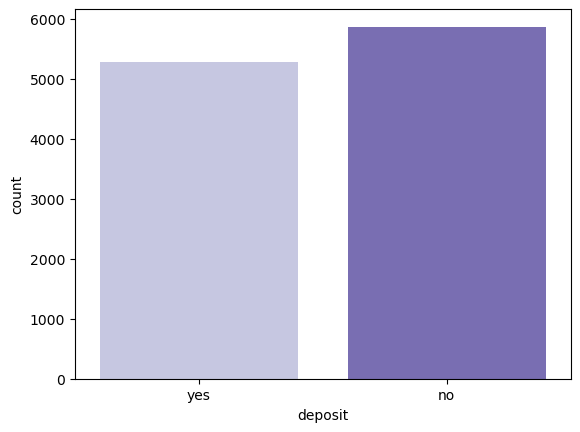

In [4]:
sns.countplot(data=data, x='deposit',saturation=1 , palette='Purples') #more or less data set is balanced

In [5]:
data.isnull().sum() #to check number of missing values in each column of the dataset

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

<Axes: xlabel='age', ylabel='deposit'>

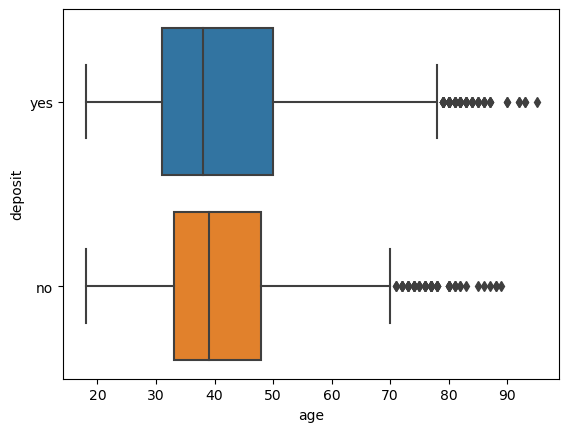

In [6]:
#checking if outliers are present when we compare age against deposit
sns.boxplot(x=data["age"],y=data["deposit"])

People from age 32-50 can for deposit = yes and people from age 32-48 can be considered for deposit = no. Looks like age 32 to 48 (intersecting age of deposit = yes and deposit = no categories) is a happening age range so we are good to target this age range for campaign (though there are hybrid patterns it is probable that there would be some customers who are converted). There are also some old people in both deposit = yes and deposit = no category because we have many outliers in the visualizaiton with respect to age. 

<Axes: xlabel='balance', ylabel='deposit'>

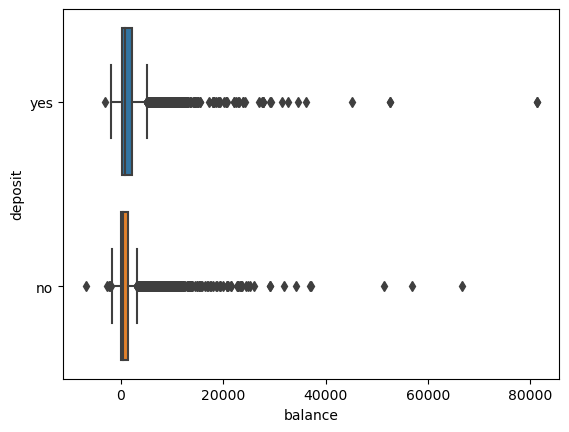

In [7]:
#checking if outliers are present when we compare balance against deposit
sns.boxplot(x=data["balance"],y=data["deposit"])

<Axes: xlabel='day', ylabel='deposit'>

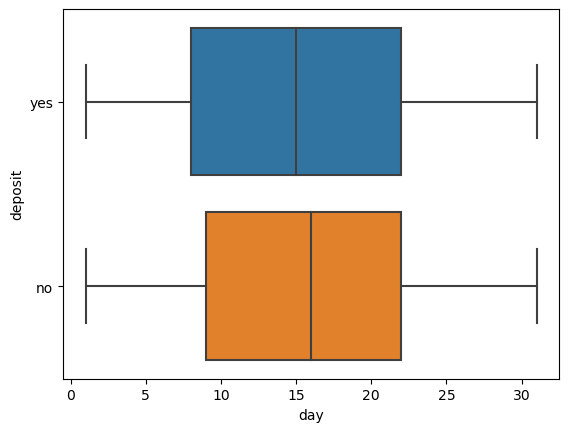

In [8]:
#checking if outliers are present when we compare day against deposit
sns.boxplot(x=data["day"],y=data["deposit"])

Looks like day quite related to deposit as there are no outliers

<Axes: xlabel='duration', ylabel='deposit'>

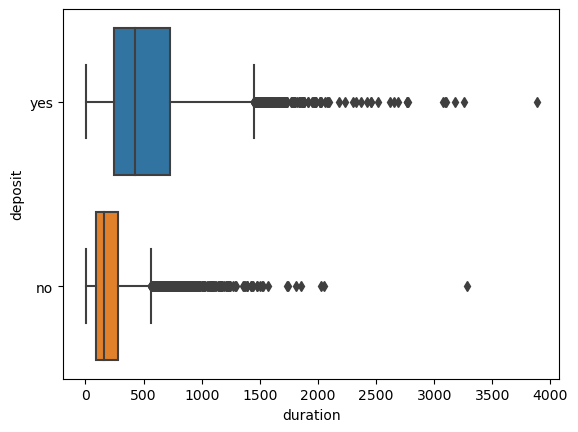

In [9]:
#checking if outliers are present when we compare duration against deposit
sns.boxplot(x=data["duration"],y=data["deposit"])

People who have deposit = no category are having high outliers of duration which means the duration can be high -- still they are not doing the deposit. 

Our campaign would be focused on deposit = yes because though there are outliers which means people having high duration are quite more -- still there are chances of getting more number of converted ppl by campaigning deposit = yes category. 

<Axes: xlabel='pdays', ylabel='deposit'>

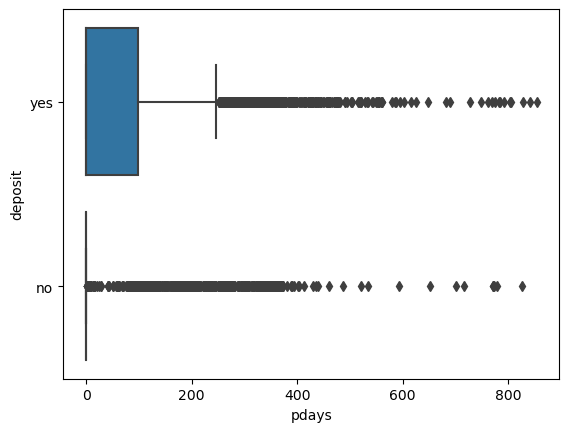

In [10]:
#checking if outliers are present when we compare pdays against deposit
sns.boxplot(x=data["pdays"],y=data["deposit"])

People who are contacted between 0 to 100 days after the previous campaign contact tend to do a deposit 

<Axes: xlabel='previous', ylabel='deposit'>

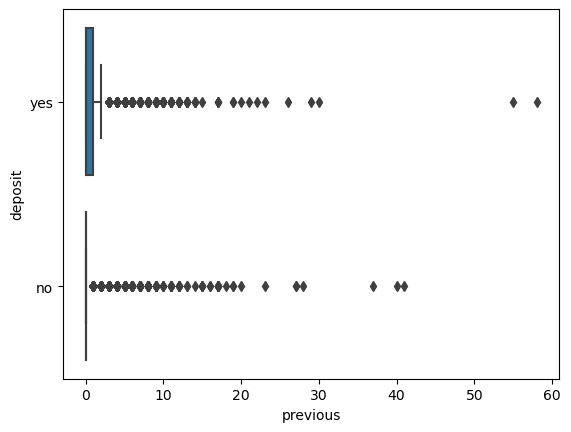

In [11]:
#checking if outliers are present when we compare previous against deposit
sns.boxplot(x=data["previous"],y=data["deposit"])

It has more outliers , no specific insights, campaign strategy needs to be modified first. Then we can revalidate previous vs deposit. Data is crowded in 0 to 5 range. 

Applying the groupby function to check the relationship of deposit variable with the other variabels in the dataset. Please note that since most of the variables have outliers, taking mean would be impacting the values, hence we are taking groupby of the column "deposit" with respect to "median"

In [12]:
data.groupby("deposit").median() #can see ppl who are saying yes to a deposit have spoken for 426 seconds on an overall absis

/var/folders/00/f2fjvt3s69zf59m5v79d43wm0000gn/T/ipykernel_18489/1617639785.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby("deposit").median() #can see ppl who are saying yes to a deposit have spoken for 426 seconds on an overall absis


,age,balance,day,duration,campaign,pdays,previous
deposit,,,,,,,
no,39.0,414.0,16.0,163.0,2.0,-1.0,0.0
yes,38.0,733.0,15.0,426.0,2.0,-1.0,0.0


/var/folders/00/f2fjvt3s69zf59m5v79d43wm0000gn/T/ipykernel_18489/3927133351.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data["duration"],bins = 50)


<Axes: ylabel='Density'>

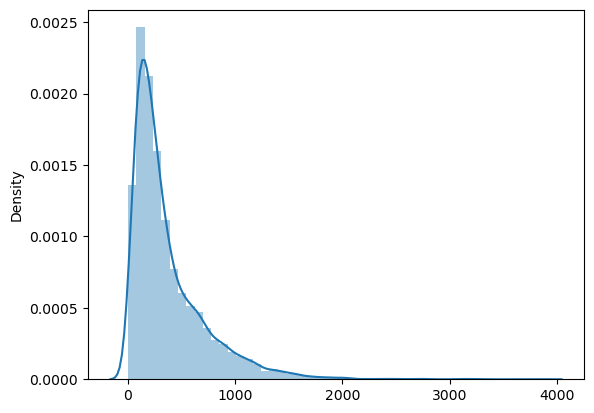

In [13]:
#checking the distribution of duration
sns.distplot(x=data["duration"],bins = 50)
#ppl who are talking from 0-500 seconds is the crowded range or central tendency 

<Axes: xlabel='duration'>

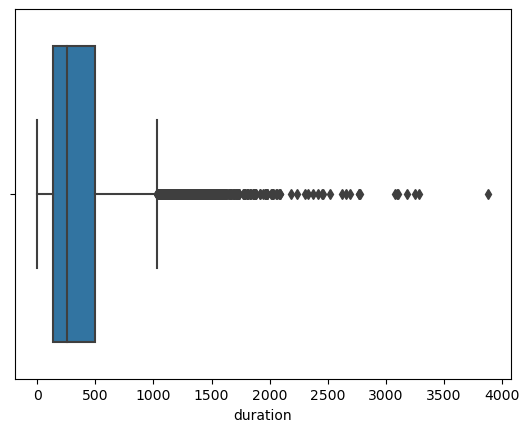

In [14]:
#checking the distribution of duration with a boxplot 
sns.boxplot(x=data["duration"])

In [15]:
#finding distinct job codes with respect to the number of jobs per category
data.job.value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [16]:
#Creating a list "jobs" with differetn cateagories
jobs = ["management","blue-collar","technician","admin","services","retired","self-employed","student","unemployed","entrepreneur","housemaid","unknown"]

In [17]:
#we are checking here the percent of deposit = yes category within each of the job catagoreis passed within the list. 

for j in jobs:
    print("{:20} : {:10}". format(j, len(data[(data.deposit == "yes") 
                                               & (data.job ==j)])))

management           :       1301
blue-collar          :        708
technician           :        840
admin                :          0
services             :        369
retired              :        516
self-employed        :        187
student              :        269
unemployed           :        202
entrepreneur         :        123
housemaid            :        109
unknown              :         34


Step 1: We are initiating a loop where J itterates over a list of job categories presented by the variable jobs

Step 2: we are printing the job catagory "j" and the count of yes values in the deposit column for that job category. 

Step 3: ("{:20} : {:10}". format(j, len(data[(data.deposit == "yes") 
                                               & (data.job ==j)])) -- this is a string formatting statement that prints the job categor j in a field of width 20 characters and the count of yes values for the job category in a field of width 10 characters. 
                                               
Step 4: len(data[(data.deposit == "yes") 
                                               & (data.job ==j)])) -- this line calculatees the countof rows wehre both, the deposit column is yes and the job column matches the current job category. 

In summary, the output here provides a summary of how many ppl with each job category have made a deposit (where deposit = "yes") in the dataset. 

In [18]:
#we are combining similar jobs into categories by using the .replace()
# e.g. admin job is also a type of management job, so we can combine both of them.
# housemaid is a type of service provider, so we can combine services and housemaid
# 'retired', 'student', 'unemployed', 'unknown' all of them come under unemployed only, so we can combine them.

data['job'] = data['job'].replace(['management', 'admin.'], 'white-collar')
data['job'] = data['job'].replace(['services','housemaid'], 'pink-collar')
data['job'] = data['job'].replace(['retired', 'student', 'unemployed', 'unknown'], 'other')

In [19]:
data.job.value_counts() #checking weather the jobs got clubbed or not 

white-collar     3900
blue-collar      1944
technician       1823
other            1565
pink-collar      1197
self-employed     405
entrepreneur      328
Name: job, dtype: int64

HW 1
- Check the distinct number of "poutcome's" and th enumber of records for each type of p outcome. 

HW2
- Combine "unknown" into "other" in "poutcome"

HW 3 
- Find the distinct values of "contact" 

HW 4
- Drop the "day", "month", "contact" from the rows by adding axis = 1, inplace = True

HW 5
- Check the overall distribution of age vs deposit 

HW 6
- Check the disbtribution of age vs deposit with respect to balance

HW 7
- Check the disbtution of job vs deposit 

HW 8 
- Do a visualization of number of jobs in each job category vs deposit (the target variable)

In [20]:
data.poutcome.value_counts()

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64

In [21]:
poutcome = ["unknown","failure","sucess","other"]

In [22]:

for p in poutcome :
    print("{:20} : {:10}". format(p, len(data[(data.deposit == "yes") 
                                               & (data.poutcome ==p)])))

unknown              :       3386
failure              :        618
sucess               :          0
other                :        307


In [23]:
#HW2-Combine "unknown" into "other" in "poutcome"
data['poutcome'] = data['poutcome'].replace(['unknown', 'other'], 'other')

In [24]:
data.poutcome.value_counts()

other      8863
failure    1228
success    1071
Name: poutcome, dtype: int64

In [25]:
# Way 2: Combining 'unknown' in 'other' in 'poutcome'

data['poutcome'] = data['poutcome'].replace(['unknown'], 'other')

In [26]:
data.poutcome.value_counts()

other      8863
failure    1228
success    1071
Name: poutcome, dtype: int64

In [27]:
#HW 4-Drop the "day", "month", "contact" from the rows by adding axis = 1, inplace = True
data.drop(['day','month','contact'], axis=1, inplace= True)

In [28]:
data

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,deposit
0,59,white-collar,married,secondary,no,2343,yes,no,1042,1,-1,0,other,yes
1,56,white-collar,married,secondary,no,45,no,no,1467,1,-1,0,other,yes
2,41,technician,married,secondary,no,1270,yes,no,1389,1,-1,0,other,yes
3,55,pink-collar,married,secondary,no,2476,yes,no,579,1,-1,0,other,yes
4,54,white-collar,married,tertiary,no,184,no,no,673,2,-1,0,other,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,257,1,-1,0,other,no
11158,39,pink-collar,married,secondary,no,733,no,no,83,4,-1,0,other,no
11159,32,technician,single,secondary,no,29,no,no,156,2,-1,0,other,no
11160,43,technician,married,secondary,no,0,no,yes,9,2,172,5,failure,no


<Axes: xlabel='job', ylabel='count'>

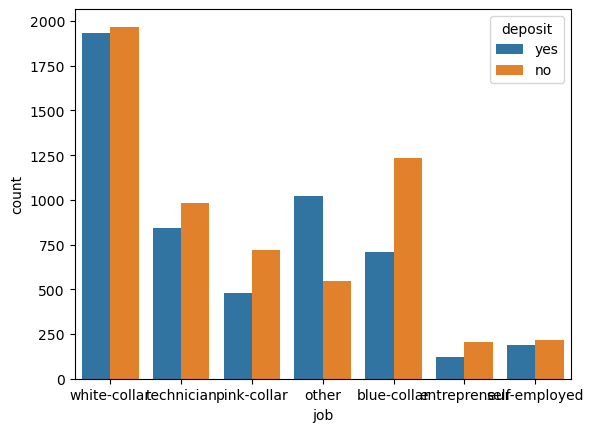

In [29]:
#HW 8: Do a visualization of number of jobs in each job category vs deposit (the target variable)
sns.countplot(x='job',hue='deposit',data=data)

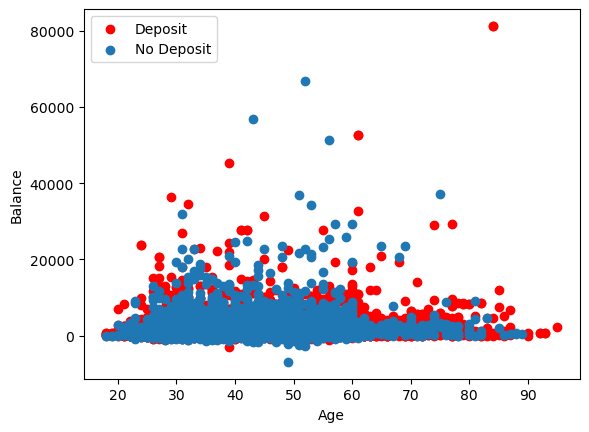

In [30]:
#HW 6 - Check the disbtribution of age vs deposit with respect to balance
#need balance, age, deposit --> balance and age are continuous and deposit is categorical 
#data.plot(kind='scatter', x='age', y='balance') --> SCATTER FOR AGE VS BALANCE

plt.scatter(x=data.age[data.deposit=='yes'], y=data.balance[(data.deposit=='yes')], c="red")
plt.scatter(x=data.age[data.deposit=='no'], y=data.balance[(data.deposit=='no')])
plt.legend(["Deposit", "No Deposit"])
plt.xlabel("Age")
plt.ylabel("Balance")
plt.show()
# Conclusion here is: age 30-45 and all ages vs balance less than = 30,000 can be our target customers for deposit 
# as target variable

<function matplotlib.pyplot.show(close=None, block=None)>

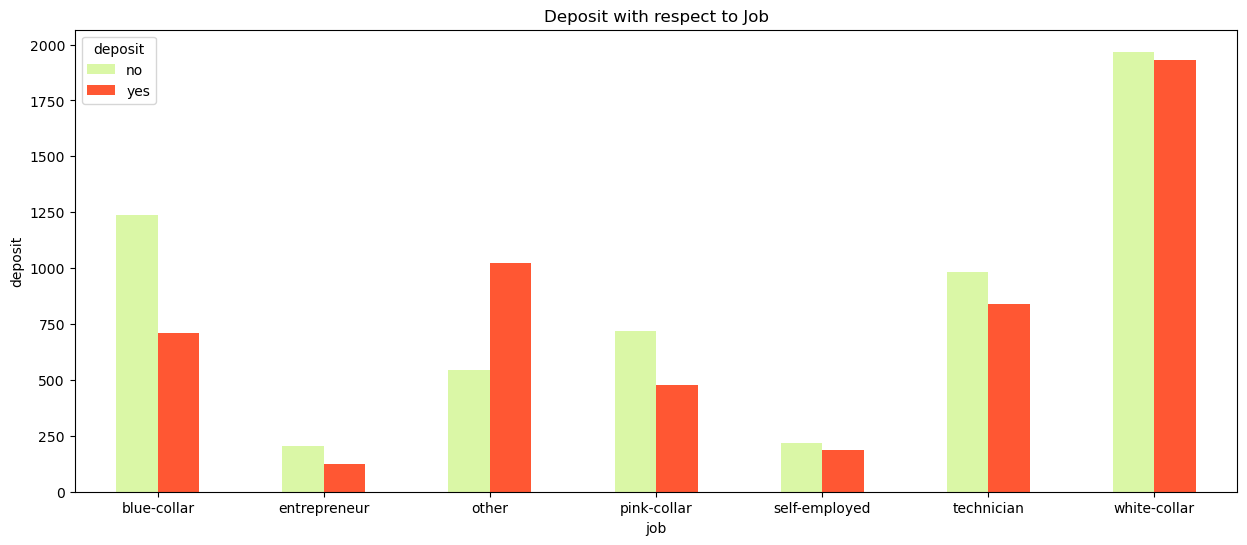

In [31]:
#HW 7- Check the disbtution of job vs deposit
#both job and deposit are categorical

# job vs deposit

pd.crosstab(data.job,data.deposit).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Deposit with respect to Job')
plt.xlabel('job')
plt.xticks(rotation = 0)
plt.ylabel('deposit')
plt.show

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'white-collar'),
  Text(1, 0, 'technician'),
  Text(2, 0, 'pink-collar'),
  Text(3, 0, 'other'),
  Text(4, 0, 'blue-collar'),
  Text(5, 0, 'entrepreneur'),
  Text(6, 0, 'self-employed')])

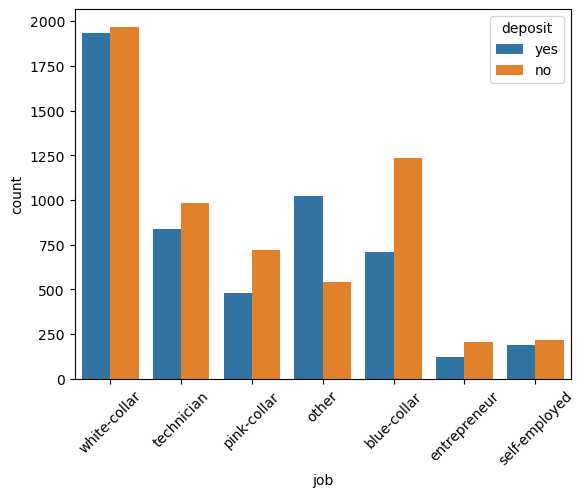

In [32]:
#can also do countplot for number 7
sns.countplot(x='job',hue='deposit',data=data)
plt.xticks(rotation = 45)

In [33]:
data.pdays.value_counts()

-1      8324
 92      106
 182      89
 91       84
 181      81
        ... 
 437       1
 728       1
 518       1
 828       1
 118       1
Name: pdays, Length: 472, dtype: int64

In [34]:
#8324 ppl were not contacted previously. 
#find the max number in pdays column 
data['pdays'].max()

854

In [35]:
#find the number of ppl having pdays = -1 using length function
len(data[data.pdays == -1])

8324

In [36]:
#number of days that passed by after client was last contacted from a previous campaign = pdays 
#-1 means that client was not previously contacted 
#number of customers that have not been contacted before = 8324
#max value of pdays = 854
#we will map pdays = -1 into a large value compared to 854 to indicate that it is so far in the past that it has no effect (10,000 can be used)
#we can change pdays = -1 to 10,000 as below
data.loc[data['pdays'] == -1, 'pdays'] = 10000

In [37]:
len(data[data.pdays == 10000])

8324

In [38]:
# data.loc[] function is used to select specific rows and columns in the dataframe as per the condition data['pdays']==-1 is true.
# 'pdays' inside the loc function specifies that we want to apply the assignment to the 'pdays' column 
# = 10000 assigns the value 10000 to the selected rows in the pdays column where the condition data['pdays'] == -1 is true.

In [39]:
# We are creating a new column 'recent_pdays' with the reciprocal of pdays (1/pdays), because we want to decrease the weightage 
# in the 'pdays' column for the clients who have never been contacted significantly.

In [40]:
data['recent_pdays']= np.where(data['pdays'], 1/data.pdays, 1/data.pdays)
# The condition df['pdays'] checks if the pdays column has non zero values. In python, non zero values are considered True
# and zero values are considered as False. Therefore this condition will be true when pdays is non zero and False, when pdays 
# is zero.

# 1/df.pdays (1st one) is the value to assign where the condition is True. It calculates reciprocal of the pdays column for
# rows where pdays is non zero.

# 1/df.pdays (2nd one) is also the value to assign where the condition is False (else condition). It may seem redundant
# as it assigns the same value as for 'True', effectively applying the reciprocal operation to all rows, including
# those where pdays is zero. This may be unintensional and could be simplified to any other desired value.

In [41]:
data

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,deposit,recent_pdays
0,59,white-collar,married,secondary,no,2343,yes,no,1042,1,10000,0,other,yes,0.000100
1,56,white-collar,married,secondary,no,45,no,no,1467,1,10000,0,other,yes,0.000100
2,41,technician,married,secondary,no,1270,yes,no,1389,1,10000,0,other,yes,0.000100
3,55,pink-collar,married,secondary,no,2476,yes,no,579,1,10000,0,other,yes,0.000100
4,54,white-collar,married,tertiary,no,184,no,no,673,2,10000,0,other,yes,0.000100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,257,1,10000,0,other,no,0.000100
11158,39,pink-collar,married,secondary,no,733,no,no,83,4,10000,0,other,no,0.000100
11159,32,technician,single,secondary,no,29,no,no,156,2,10000,0,other,no,0.000100
11160,43,technician,married,secondary,no,0,no,yes,9,2,172,5,failure,no,0.005814


In [42]:
data1=data.drop(['pdays'],axis=1,inplace=True)

In [43]:
data

,age,job,marital,education,default,balance,housing,loan,duration,campaign,previous,poutcome,deposit,recent_pdays
0,59,white-collar,married,secondary,no,2343,yes,no,1042,1,0,other,yes,0.000100
1,56,white-collar,married,secondary,no,45,no,no,1467,1,0,other,yes,0.000100
2,41,technician,married,secondary,no,1270,yes,no,1389,1,0,other,yes,0.000100
3,55,pink-collar,married,secondary,no,2476,yes,no,579,1,0,other,yes,0.000100
4,54,white-collar,married,tertiary,no,184,no,no,673,2,0,other,yes,0.000100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,257,1,0,other,no,0.000100
11158,39,pink-collar,married,secondary,no,733,no,no,83,4,0,other,no,0.000100
11159,32,technician,single,secondary,no,29,no,no,156,2,0,other,no,0.000100
11160,43,technician,married,secondary,no,0,no,yes,9,2,5,failure,no,0.005814


Columns to encode:
- job
- marital
- education
- default
- housing
- loan
- poutcome
- deposit

In [44]:
# One Hot Encoding variables having values 'yes' and 'no'- 'default', 'housing','loan' and 'deposit'

# values for "default" : yes/no

data['default_cat'] = data['default'].map({'yes':1, 'no':0})
data.drop('default', axis=1,inplace = True)

In [45]:
# values for "housing" : yes/no
data['housing_cat'] = data['housing'].map({'yes':1, 'no':0})
data.drop('housing', axis=1,inplace = True)

In [46]:
# values for "deposit" : yes/no
data['deposit_cat'] = data['deposit'].map({'yes':1, 'no':0})
data.drop('deposit', axis=1,inplace = True)

In [47]:
# values for "loan" : yes/no
data['loan_cat'] = data['loan'].map({'yes':1, 'no':0})
data.drop('loan', axis=1,inplace = True)

In [48]:
data

,age,job,marital,education,balance,duration,campaign,previous,poutcome,recent_pdays,default_cat,housing_cat,deposit_cat,loan_cat
0,59,white-collar,married,secondary,2343,1042,1,0,other,0.000100,0,1,1,0
1,56,white-collar,married,secondary,45,1467,1,0,other,0.000100,0,0,1,0
2,41,technician,married,secondary,1270,1389,1,0,other,0.000100,0,1,1,0
3,55,pink-collar,married,secondary,2476,579,1,0,other,0.000100,0,1,1,0
4,54,white-collar,married,tertiary,184,673,2,0,other,0.000100,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,1,257,1,0,other,0.000100,0,1,0,0
11158,39,pink-collar,married,secondary,733,83,4,0,other,0.000100,0,0,0,0
11159,32,technician,single,secondary,29,156,2,0,other,0.000100,0,0,0,0
11160,43,technician,married,secondary,0,9,2,5,failure,0.005814,0,0,0,1


In [49]:
data.job.value_counts()

white-collar     3900
blue-collar      1944
technician       1823
other            1565
pink-collar      1197
self-employed     405
entrepreneur      328
Name: job, dtype: int64

In [50]:
data.marital.value_counts()

married     6351
single      3518
divorced    1293
Name: marital, dtype: int64

In [51]:
data.education.value_counts()

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64

In [52]:
data.poutcome.value_counts()

other      8863
failure    1228
success    1071
Name: poutcome, dtype: int64

In [ ]:
sns.countplot(x='poutcome', hue='deposit_cat', data=data)

In [ ]:
# We have to encode 'job','marital','education',and 'poutcome' columns of the data set. 
# job: Since there are multiple categories, we are not using Label encoding here. We will use One Hot Encoding.
# marital: Either label encoding or one hot encoding (preferably, since there are more than 2 categories).
# education: One Hot Encoding or Ordinal encoding, since there is inherent order.
# poutcome: Here, we will use Label or One hot encoding (preferably, since there are more than 2 categories).
# Since One Hot Encoding is common in all the 4 columns, we can apply One Hot Encoding in all 4 columns.

In [54]:
# Creating a new dataset 'df_encoded' with additional encoded columns related to variables- job, marital, education and poutcome

data_encoded= pd.get_dummies(data=data, columns=['job','marital','education','poutcome'], prefix=['job','marital','education','poutcome'])

In [55]:
data_encoded

,age,balance,duration,campaign,previous,recent_pdays,default_cat,housing_cat,deposit_cat,loan_cat,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success
0,59,2343,1042,1,0,0.000100,0,1,1,0,...,0,1,0,0,1,0,0,0,1,0
1,56,45,1467,1,0,0.000100,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
2,41,1270,1389,1,0,0.000100,0,1,1,0,...,0,1,0,0,1,0,0,0,1,0
3,55,2476,579,1,0,0.000100,0,1,1,0,...,0,1,0,0,1,0,0,0,1,0
4,54,184,673,2,0,0.000100,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,257,1,0,0.000100,0,1,0,0,...,0,0,1,1,0,0,0,0,1,0
11158,39,733,83,4,0,0.000100,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
11159,32,29,156,2,0,0.000100,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
11160,43,0,9,2,5,0.005814,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0


In [56]:
data_encoded.columns

Index(['age', 'balance', 'duration', 'campaign', 'previous', 'recent_pdays',
       'default_cat', 'housing_cat', 'deposit_cat', 'loan_cat',
       'job_blue-collar', 'job_entrepreneur', 'job_other', 'job_pink-collar',
       'job_self-employed', 'job_technician', 'job_white-collar',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'poutcome_failure', 'poutcome_other',
       'poutcome_success'],
      dtype='object')

In [57]:
#dropping job_pink-collar, dropping marital_single, dropping education_unkown, dropping poutcome_other
data2=data_encoded.drop(['job_pink-collar','marital_single','education_unknown','poutcome_other'],axis=1,inplace=True)

In [58]:
data_encoded

,age,balance,duration,campaign,previous,recent_pdays,default_cat,housing_cat,deposit_cat,loan_cat,...,job_self-employed,job_technician,job_white-collar,marital_divorced,marital_married,education_primary,education_secondary,education_tertiary,poutcome_failure,poutcome_success
0,59,2343,1042,1,0,0.000100,0,1,1,0,...,0,0,1,0,1,0,1,0,0,0
1,56,45,1467,1,0,0.000100,0,0,1,0,...,0,0,1,0,1,0,1,0,0,0
2,41,1270,1389,1,0,0.000100,0,1,1,0,...,0,1,0,0,1,0,1,0,0,0
3,55,2476,579,1,0,0.000100,0,1,1,0,...,0,0,0,0,1,0,1,0,0,0
4,54,184,673,2,0,0.000100,0,0,1,0,...,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,257,1,0,0.000100,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
11158,39,733,83,4,0,0.000100,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
11159,32,29,156,2,0,0.000100,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
11160,43,0,9,2,5,0.005814,0,0,0,1,...,0,1,0,0,1,0,1,0,1,0


In [59]:
data_encoded.columns

Index(['age', 'balance', 'duration', 'campaign', 'previous', 'recent_pdays',
       'default_cat', 'housing_cat', 'deposit_cat', 'loan_cat',
       'job_blue-collar', 'job_entrepreneur', 'job_other', 'job_self-employed',
       'job_technician', 'job_white-collar', 'marital_divorced',
       'marital_married', 'education_primary', 'education_secondary',
       'education_tertiary', 'poutcome_failure', 'poutcome_success'],
      dtype='object')

In [60]:
# Feature scaling of 'data_encoded'

# Dividing the data set in x and y

y = data_encoded.deposit_cat.values
x = data_encoded.drop(['deposit_cat'], axis = 1)

In [61]:
x

,age,balance,duration,campaign,previous,recent_pdays,default_cat,housing_cat,loan_cat,job_blue-collar,...,job_self-employed,job_technician,job_white-collar,marital_divorced,marital_married,education_primary,education_secondary,education_tertiary,poutcome_failure,poutcome_success
0,59,2343,1042,1,0,0.000100,0,1,0,0,...,0,0,1,0,1,0,1,0,0,0
1,56,45,1467,1,0,0.000100,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
2,41,1270,1389,1,0,0.000100,0,1,0,0,...,0,1,0,0,1,0,1,0,0,0
3,55,2476,579,1,0,0.000100,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
4,54,184,673,2,0,0.000100,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,257,1,0,0.000100,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
11158,39,733,83,4,0,0.000100,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
11159,32,29,156,2,0,0.000100,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
11160,43,0,9,2,5,0.005814,0,0,1,0,...,0,1,0,0,1,0,1,0,1,0


In [62]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [63]:
# Scaling- Normalize

x = (x - np.min(x)) / (np.max(x) - np.min(x)).values
x

/Users/anoushka/anaconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/Users/anoushka/anaconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/Users/anoushka/anaconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


,age,balance,duration,campaign,previous,recent_pdays,default_cat,housing_cat,loan_cat,job_blue-collar,...,job_self-employed,job_technician,job_white-collar,marital_divorced,marital_married,education_primary,education_secondary,education_tertiary,poutcome_failure,poutcome_success
0,0.532468,0.104371,0.268110,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.493506,0.078273,0.377675,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.298701,0.092185,0.357566,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.480519,0.105882,0.148750,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.467532,0.079851,0.172983,0.016129,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,0.194805,0.077773,0.065739,0.000000,0.000000,0.000000,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
11158,0.272727,0.086086,0.020882,0.048387,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
11159,0.181818,0.078091,0.039701,0.016129,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
11160,0.324675,0.077762,0.001805,0.016129,0.086207,0.005715,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [64]:
#apply traintestsplit
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train , X_test , y_train , y_test = train_test_split(x,y, test_size=.2,
                                                       random_state=91)

In [65]:
model = LogisticRegression()

In [66]:
model.fit(X_train,y_train)

LogisticRegression()

In [67]:
y_prediction= model.predict(X_test)
y_prediction

array([1, 1, 1, ..., 0, 1, 0])

In [68]:
accuracy = accuracy_score(y_test,y_prediction)
print("Accuracy:", accuracy)

Accuracy: 0.7841468875951635


In [69]:
#now we will apply the second model which is decisiont tree

# Model 2: Decision Tree

# Decision tree with depth 2

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dtc2= tree.DecisionTreeClassifier(random_state=1, max_depth=2)
dtc2.fit(X_train,y_train)
dtc2_score_train = dtc2.score(X_train, y_train)
dtc2_score_test = dtc2.score(X_test, y_test)



In [70]:
# (Overfitting means Training score is more and testing score is less.)

# Underfitting means both, Train and Test score is low.
dtc2_score_train


0.7258371598163288

In [71]:
dtc2_score_test

0.7375727720555306

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dtc3= tree.DecisionTreeClassifier(random_state=1, max_depth=3)
dtc3.fit(X_train,y_train)
dtc3_score_train = dtc3.score(X_train, y_train)
dtc3_score_test = dtc3.score(X_test, y_test)

In [73]:
dtc3_score_train

0.7552917459961922

In [74]:
dtc3_score_test

0.7577250335871025

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dtc4= tree.DecisionTreeClassifier(random_state=1, max_depth=4)
dtc4.fit(X_train,y_train)
dtc4_score_train = dtc4.score(X_train, y_train)
dtc4_score_test = dtc4.score(X_test, y_test)

In [76]:
dtc4_score_train

0.7873222085339904

In [77]:
dtc4_score_test

0.7877295118674429

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dtc5= tree.DecisionTreeClassifier(random_state=1, max_depth=5)
dtc5.fit(X_train,y_train)
dtc5_score_train = dtc5.score(X_train, y_train)
dtc5_score_test = dtc5.score(X_test, y_test)

In [79]:
dtc5_score_train

0.798409676335536

In [80]:
dtc5_score_test

0.7904164800716524

In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dtc6= tree.DecisionTreeClassifier(random_state=1, max_depth=6)
dtc6.fit(X_train,y_train)
dtc6_score_train = dtc6.score(X_train, y_train)
dtc6_score_test = dtc6.score(X_test, y_test)

In [82]:
dtc6_score_train

0.8077052301489529

In [83]:
dtc6_score_test

0.7948947604120018

In [84]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dtc15= tree.DecisionTreeClassifier(random_state=1, max_depth=15)
dtc15.fit(X_train,y_train)
dtc15_score_train = dtc15.score(X_train, y_train)
dtc15_score_test = dtc15.score(X_test, y_test)

In [85]:
dtc15_score_train

0.9353791018031135

In [86]:
dtc15_score_test

0.761307657859382

decision tree with depth 15 means overfitting case bc the training score is 93 percent which is much more than the testing score which is 76% -- out of dct with depth 6, and LR, we dct6 has more accuracy of 79.4% --> this is the best concluding model

In [87]:
# Accuracy, Precision and Recall-Model 2-Decision Tree using GridSearchCV:

from sklearn.metrics import accuracy_score, precision_score, recall_score

In [88]:
# Make predictions on the test data set using model 2-Decision Tree:

y_pred_dtc6 = dtc6.predict(X_test)
print("Accuracy (Decision Tree):", accuracy_score(y_test, y_pred_dtc6))
print("Precision (Decision Tree):", precision_score(y_test, y_pred_dtc6))
print("Recall (Decision Tree):", recall_score(y_test, y_pred_dtc6))

# Accuracy: True observation/ Total observation
# Precision = True Positives / (True Positives + False Positives) = True Positive/Predicted Results.
# Recall = True Positives / (True Positives + False Negatives) = True Positive/ Actual Results.

Accuracy (Decision Tree): 0.7948947604120018
Precision (Decision Tree): 0.7590260285474392
Recall (Decision Tree): 0.8409302325581396


In [89]:
# Model 3: Random Forest Classification

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 1000, random_state = 1) 

# n_estimators: How many Decision Trees this Random Forest model will include

rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=1)

In [90]:
# Predicting the values after applying model 3- Random Forest model:

from sklearn.ensemble import RandomForestClassifier

# rf = RandomForestClassifier()
# rf.fit(x_train, y_train)

y_pred_rf = rf.predict(X_test)
# Accuracy, Precision and Recall-Model 3-Random Forest:

from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy (Random Forest):", accuracy_score(y_test, y_pred_rf))
print("Precision (Random Forest):", precision_score(y_test, y_pred_rf))
print("Recall (Random Forest):", recall_score(y_test, y_pred_rf))

# Accuracy: True observation/ Total observation
# Precision = True Positives / (True Positives + False Positives) = True Positive/Predicted Results.
# Recall = True Positives / (True Positives + False Negatives) = True Positive/ Actual Results.
#Precision measures the proportion of correctly identified positive cases out of all the cases predicted as positive by the model. It is calculated as the ratio of true positives to the sum of true positives and false positives. Precision provides an indication of the accuracy of the model&#39;s positive predictions.
#Recall measures the proportion of actual positive cases that are correctly identified by the model. It is calculated as the ratio of true positivesto the sum of true positives and false negatives. A high recall indicates that the model is good at identifying positive cases.

Accuracy (Random Forest): 0.8119122257053292
Precision (Random Forest): 0.7860262008733624
Recall (Random Forest): 0.8372093023255814


Case of High recall and Low precision : 

- scenario: in this scenario the model is less conservative and makes more positive predictions even when its less confident. This increases the chances of capturing all positive instances but also leads to more false positives. 

- implication: the model has a high recall because it captures most of the positive instances. However it also has a low precision because a significant portion of its positive predictions are incorrect (false positives)



accuracy: accuracy measures the overall correctness of predictions made by a classification model. it calculates the ratio of correctly predicted instances to the total number of instances in the dataset. The accuracy in this case is 81 % means that the models predictions wrer correct for approximately 81% of the instances in the dataset

 If precision is 78.6 percentage means that when the model predicts a positive class it is correct approximately 78.6 percentage of the time.
 
 In our case a recall of 83.7 percentage means that the model correctly identified only abt 83.7 percentage of the actual positive instances. 


In [91]:
from sklearn.metrics import confusion_matrix
cm_dtc = confusion_matrix(y_test,y_pred_dtc6)
cm_dtc


array([[871, 287],
       [171, 904]])

<Axes: >

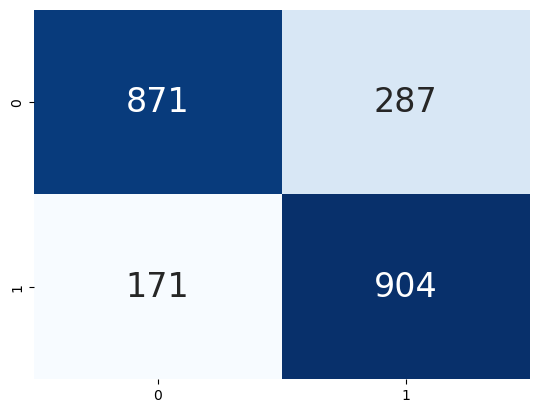

In [92]:
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})


In [93]:
# Confusion metrics for Model 3-Random Forest:

cm_rf = confusion_matrix(y_test,y_pred_rf)
cm_rf

array([[913, 245],
       [175, 900]])

<Axes: >

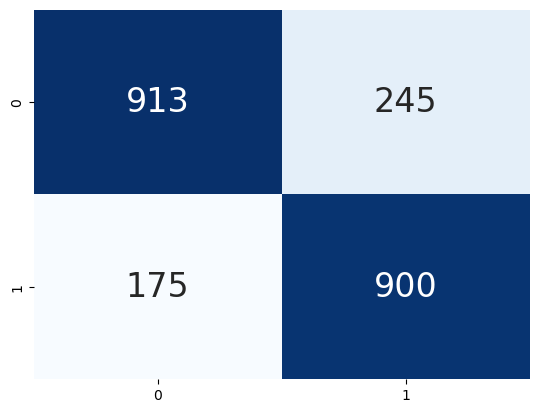

In [95]:
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})